In [ ]:
##getting bounding box from llm

In [1]:
from mb_rag.utils.bounding_box import BoundingBoxConfig,BoundingBoxProcessor
import os

In [2]:
config = BoundingBoxConfig(
    model_name="gemini-1.5-flash",
    api_key=os.getenv("GOOGLE_API_KEY")  # Make sure to set your API key
)


In [3]:
processor = BoundingBoxProcessor(config)

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
image_path = "/home/malav/Downloads/boilled_eggs.jpeg"  
boxes = processor.generate_bounding_boxes(
    image_path,
    prompt="Return bounding boxes of objects, for each only one return [ymin, xmin, ymax, xmax] in a dictionary with name of object as key and list of bounding boxes as value",
)
print("Generated Bounding Boxes:", boxes)

Generated Bounding Boxes: response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "{\n  \"egg\": [294,290,361,392],\n  \"egg\": [440,421,515,522],\n  \"egg\": [483,662,573,769],\n  \"egg\": [294,565,366,657],\n  \"egg\": [654,356,745,476],\n  \"egg\": [570,156,655,270],\n  \"egg\": [393,132,478,245]\n}"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP"
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 295,
        "candidates_token_count": 157,
        "total_token_count": 452
      }
    }),
)


In [5]:
boxes.text

'{\n  "egg": [294,290,361,392],\n  "egg": [440,421,515,522],\n  "egg": [483,662,573,769],\n  "egg": [294,565,366,657],\n  "egg": [654,356,745,476],\n  "egg": [570,156,655,270],\n  "egg": [393,132,478,245]\n}'

In [14]:
sample_boxes = {'eggs1':[295,290,361,391],'eggs2':[440,422,519,522],'eggs3':[565,155,650,270],'eggs4':[654,358,745,481]} #sample bounding boxes

In [7]:
processed_img = processor.add_bounding_boxes(
    image_path,
    sample_boxes,
    color=(0, 255, 0),  # Green color
    thickness=2,
    font_scale=0.5,
    show=False,  # Display the result
    google_bb=True,  # Google's bounding boxes
)

In [8]:
processor.save_image(processed_img, "./examples/output.jpg")

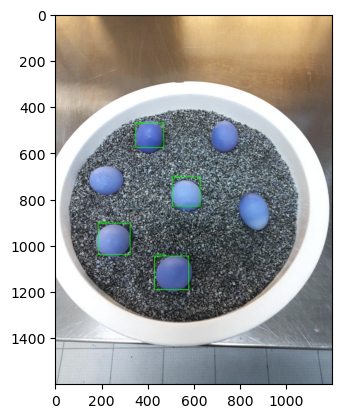

In [13]:
import matplotlib.pyplot as plt
plt.imshow(processed_img)